In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

读取模板数字,然后分割并预处理数字模板

In [2]:
# img = cv2.imread('../OCR credit_card recogition/ocr_a_reference.png',0)
# num_img_list = []
# for i in range(10):
#     num_img = img[20:len(img)-20,i*80+10:(i+1)*80-10]
#     _,bin_num_img = cv2.threshold(num_img,127,255,cv2.THRESH_BINARY)
#     num_img_list.append(bin_num_img)
#     cv2.namedWindow('number',cv2.WINDOW_NORMAL)
#     cv2.imshow('number',bin_num_img)
#     cv2.waitKey(0)
# cv2.destroyAllWindows()

水平分割图像的数字模板

In [2]:
def TemplateNum():
    img = cv2.imread('../OCR credit_card recogition/ocr_a_reference.png',0)
    img = img[20:len(img)-20]
    s_img_list = [[img[i][s] for i in range(len(img))] for s in range(len(img[0]))]
    s_black_pixel_count = [i.count(0) for i in s_img_list]
    in_split = False
    s_split_list = []
    for i in range(len(s_black_pixel_count)):
        if s_black_pixel_count[i] > 0:
            if in_split == False:
                s_split_list.append(i)
                in_split = True
        else:
            if in_split == True:
                s_split_list.append(i)
            in_split = False
    num_split_img_list = []
    for i in range(1,len(s_split_list),2):
        split_img = img[0:-1,s_split_list[i-1]:s_split_list[i]]
        num_split_img_list.append(split_img)
        cv2.imshow('split',split_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
    return num_split_img_list
Template_num = TemplateNum()

读信用卡

In [106]:
def ReadCreditCard():
    card_img_list = []
    for i in range(1,6):
        card_img = cv2.imread('../OCR credit_card recogition/credit_card_0'+str(i)+'.png',0)
        card_img = cv2.resize(card_img,(1200,750))
        card_img = cv2.blur(card_img,(3,3))
        _,bin_card = cv2.threshold(card_img,150,255,cv2.THRESH_BINARY_INV)
        contours, _ = cv2.findContours(bin_card,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
        Rect_x = []
        Rect_area = []
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            area = w*h
            if w>400:
                Rect_x.append((x,y,w,h))
                Rect_area.append(area)
                crop = bin_card[y:y+h,x:x+w]
                crop = cv2.resize(crop,(1200,750))
                if i == 3:
                    _,crop = cv2.threshold(crop,0,255,cv2.THRESH_BINARY_INV)
                    kernel = np.ones((7,7),np.uint8)
                    crop = cv2.dilate(crop,kernel,iterations = 1)
                    _,crop = cv2.threshold(crop,0,255,cv2.THRESH_BINARY_INV)
                else:
                    _,crop = cv2.threshold(crop,0,255,cv2.THRESH_BINARY)
        card_img_list.append(crop)
        cv2.namedWindow('credit card',cv2.WINDOW_NORMAL)
        cv2.imshow('credit card',crop)
        cv2.waitKey(0)
    cv2.destroyAllWindows()
    return card_img_list
card_img = ReadCreditCard()

根据信用卡上的数字shape大小，预处理模板数字“1”的shape

In [88]:
card_num_img = card_img_list[0][198:226,98:115]
cv2.namedWindow('img',cv2.WINDOW_NORMAL)
cv2.imshow('img',card_num_img)
print(card_num_img.shape)
cv2.waitKey(0)
cv2.destroyAllWindows()
ocr_num0_img = num_split_img_list[0]
ocr_num1_img = cv2.resize(ocr_num0_img,((card_num_img.shape)[1],(card_num_img.shape)[0]) )
_,ocr_num0_img = cv2.threshold(ocr_num0_img,1,255,cv2.THRESH_BINARY)
ocr_num1_img = num_split_img_list[1]
ocr_num1_img = cv2.resize(ocr_num1_img,((s_split_img_list[4].shape)[1],(s_split_img_list[4].shape)[0]) )
_,ocr_num1_img = cv2.threshold(ocr_num1_img,1,255,cv2.THRESH_BINARY)
cv2.namedWindow('img',cv2.WINDOW_NORMAL)
cv2.imshow('img',ocr_num1_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(28, 17)


模板匹配样例

In [86]:
res = cv2.matchTemplate(card_img_list[0],ocr_num1_img,cv2.TM_SQDIFF_NORMED)
w,h = ocr_num1_img.shape[::-1]
cv2.normalize( res, res, 0, 1, cv2.NORM_MINMAX, -1 )
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
res_img = card_img_list[0].copy()
res_img = cv2.cvtColor(res_img,cv2.COLOR_GRAY2BGR)
cv2.rectangle(res_img,min_loc,(min_loc[0]+w,min_loc[1]+h) ,(255,0,0),2)
cv2.imshow('res',res_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

分割图像

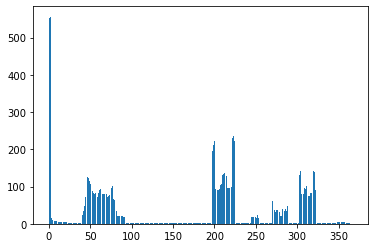

In [21]:
black_pixel_count = [i.tolist().count(0) for i in card_img_list[0]]
plt.bar(range(len(black_pixel_count)),black_pixel_count)
plt.show()

In [72]:
black_pixel_count = [i.tolist().count(0) for i in card_img_list[0]]
in_split = False
h_split_list = []
for i in range(len(black_pixel_count)):
    if black_pixel_count[i] > 5:
        if in_split == False:
            h_split_list.append(i)
            in_split = True
    else:
        if in_split == True:
            h_split_list.append(i)
        in_split = False
h_split_img_list = []
for i in range(1,len(h_split_list),2):
    split_img = card_img_list[0][h_split_list[i-1]:h_split_list[i]]
    h_split_img_list.append(split_img)

In [77]:
cv2.imshow('split',h_split_img_list[2])
cv2.waitKey(0)
cv2.destroyAllWindows()

分割纵向

In [26]:
s_img_list = []
for s in range(len(h_split_img_list[2][0])):
    s_img = []
    for i in range(len(h_split_img_list[2])):
        s_img.append(h_split_img_list[2][i][s])
    s_img_list.append(s_img)

用列表生成式

In [74]:
s_img_list = [[h_split_img_list[2][i][s] for i in range(len(h_split_img_list[2]))] for s in range(len(h_split_img_list[2][0]))]

In [76]:
s_black_pixel_count = [i.count(0) for i in s_img_list]
in_split = False
s_split_list = []
for i in range(len(s_black_pixel_count)):
    if s_black_pixel_count[i] > 0:
        if in_split == False:
            s_split_list.append(i)
            in_split = True
    else:
        if in_split == True:
            s_split_list.append(i)
        in_split = False
s_split_img_list = []
for i in range(1,len(s_split_list),2):
    split_img = h_split_img_list[2][0:-1,s_split_list[i-1]:s_split_list[i]]
    s_split_img_list.append(split_img)
    cv2.imshow('split',split_img)
    cv2.waitKey(0)
cv2.destroyAllWindows()

字典操作

In [53]:
a = {'(1,1)':split_img}
a['[(2,1),(2,2)]']:split_img
a.update({'[(1,2),(2,3)]':split_img})
b = '(1,1)'
b = eval(b)
for key,value in a.items():
    key = eval(key)
    print(key)

实例测试

In [6]:
class Process_ocr:
    def __init__(self):
        self.src_img = []
        self.bin_img = []
        self.split_img = {}
        self.ocr_num = {}
    def SplitImg(self):
        black_pixel_count = [i.tolist().count(0) for i in self.src_img]
        in_split = False
        h_split_list = []
        #分割纵向
        for i in range(len(black_pixel_count)):
            if black_pixel_count[i] > 5:
                if in_split == False:
                    h_split_list.append(i)
                    in_split = True
            else:
                if in_split == True:
                    h_split_list.append(i)
                in_split = False
        h_split_img_list = []
        h_split_start = []
        for i in range(1,len(h_split_list),2):
            h_split_img = self.src_img[h_split_list[i-1]:h_split_list[i]]
            h_split_start.append(h_split_list[i-1])
            h_split_img_list.append(h_split_img)
        #分割横向
        for j in range(len(h_split_img_list)):
            s_img_list = []
            for s in range(len(h_split_img_list[j][0])):
                s_img = []
                for i in range(len(h_split_img_list[j])):
                    s_img.append(h_split_img_list[j][i][s])
                s_img_list.append(s_img)
            s_black_pixel_count = [i.count(0) for i in s_img_list]
            in_split = False
            s_split_list = []
            for i in range(len(s_black_pixel_count)):
                if s_black_pixel_count[i] > 0:
                    if in_split == False:
                        s_split_list.append(i)
                        in_split = True
                else:
                    if in_split == True:
                        s_split_list.append(i)
                    in_split = False
            for i in range(1,len(s_split_list),2):
                split_img = h_split_img_list[j][0:-1,s_split_list[i-1]:s_split_list[i]]
                position = [(s_split_list[i-1],h_split_start[j]),(s_split_list[i],h_split_start[j]+len(split_img))]
                self.split_img.update({str(position):split_img})
        

In [107]:
def TestOCR(i):
    process_ocr = Process_ocr()
    process_ocr.src_img = card_img[i]
    process_ocr.SplitImg()
    for box,img in process_ocr.split_img.items():
        res_img = card_img[i].copy()
        res_img = cv2.cvtColor(res_img,cv2.COLOR_GRAY2BGR)
        box = eval(box)
        cv2.rectangle(res_img,(box[0][0],box[0][1]),(box[1][0],box[1][1]),(255,0,0),3)
        cv2.imshow('res',res_img)
        cv2.imshow('split',img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
TestOCR(3)

In [39]:
cv2.destroyAllWindows()

In [20]:
cv2.imshow('card',card_img[3])
cv2.waitKey(0)
cv2.destroyAllWindows()

轮廓检测和其近似

In [51]:
img = card_img[3].copy()
contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
cv2.drawContours(img,contours,-1,(0,0,255),2)  
cv2.imshow("img", img)  
cv2.waitKey(0) 
cv2.destroyAllWindows()


读取信用卡数字

In [127]:
def ReadCreditCard():
    card_img_list = []
    for i in range(1,6):
        card_img = cv2.imread('../OCR credit_card recogition/credit_card_0'+str(i)+'.png',0)
        card_img = cv2.resize(card_img,(1200,750))
        card_img = cv2.blur(card_img,(3,3))
        _,card_img = cv2.threshold(card_img,150,255,cv2.THRESH_BINARY_INV)
        card_img_list.append(card_img)
    return card_img_list
card_img = ReadCreditCard()

In [131]:
def BoundCrop():
	for i in card_img:
		Rect_x = []
		Rect_area = []
		img = i.copy()
		contours, hierarchy = cv2.findContours(img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
		img = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)
		for cnt in contours:
			x,y,w,h = cv2.boundingRect(cnt)
			area = w*h
			if w>20 and h>45 and w<45 and h<70 and y>300 and y<450:
				Rect_x.append((x,y,w,h))
				Rect_area.append(area)
				cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),2)
				crop = img[y:y+h,x:x+w]
				cv2.imshow('crop',crop)
				
		cv2.imshow("test_image",img)
		cv2.waitKey(0)
		cv2.destroyAllWindows()
BoundCrop()

In [137]:
def CardProcess():
    ocr_card_img = []
    src_card_img = []
    for i in range(1,6):
        card_img = cv2.imread('../OCR credit_card recogition/credit_card_0'+str(i)+'.png')
        card_img = cv2.resize(card_img,(1200,750))
        card_img = cv2.blur(card_img,(3,3))
        ocr_img = card_img.copy()
        card_img = cv2.cvtColor(card_img,cv2.COLOR_BGR2GRAY)
        src_card_img.append(card_img)
        _,card_img = cv2.threshold(card_img,150,255,cv2.THRESH_BINARY_INV)
        Rect_x = []
        Rect_area = []
        contours,_ = cv2.findContours(card_img,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)  
        for cnt in contours:
            x,y,w,h = cv2.boundingRect(cnt)
            area = w*h
            if w>20 and h>45 and w<45 and h<70 and y>300 and y<450:
                Rect_x.append((x,y,w,h))
                Rect_area.append(area)
                cv2.rectangle(ocr_img,(x,y),(x+w,y+h),(0,255,0),2)
                crop = ocr_img[y:y+h,x:x+w]
        ocr_card_img.append(ocr_img)
        cv2.imshow("test_image",ocr_img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()
CardProcess()